In [18]:
import pandas as pd
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle
from skimage.feature import hog
from skimage import color
from itertools import product
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

In [3]:
data_train = pd.DataFrame()
data_train['images']=pd.Series(list(x_train))
data_train['labels']=pd.Series(y_train)

data_test = pd.DataFrame()
data_test['images']=pd.Series(list(x_test))
data_test['labels']=pd.Series(y_test)

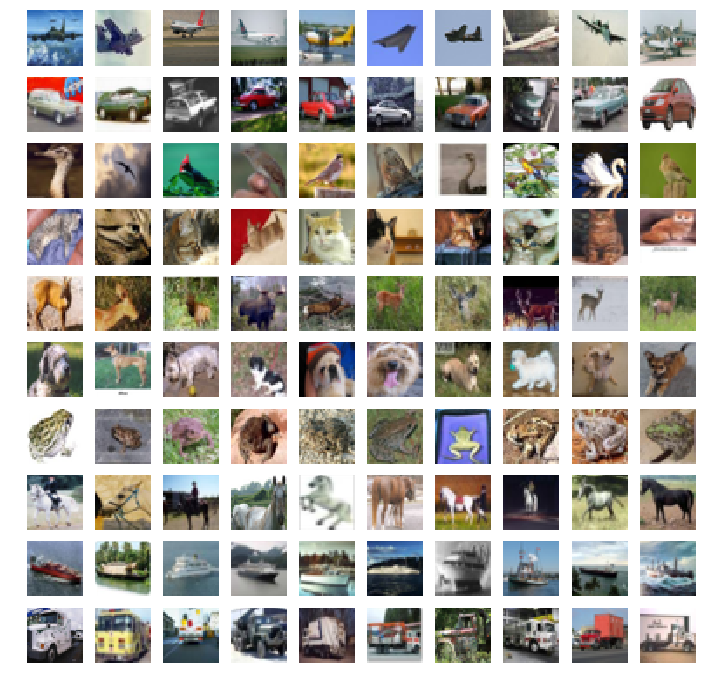

In [4]:
to_print=[None]*10
for i in range(10):
    to_print[i] = data_train[data_train.labels==i].sample(10).images.reset_index(drop=True)

_, axs = plt.subplots(10,10, figsize=(12,12))

for i,j in product(range(10),repeat=2):
    axs[i,j].imshow(to_print[i][j])
    axs[i,j].axis('off')

In [5]:
def hog_feat(array):
    return hog(color.rgb2gray(array), orientations=8, pixels_per_cell=(4, 4), cells_per_block=(4, 4))

data_train['hog_features'] = data_train.images.apply(hog_feat)
data_test['hog_features'] = data_test.images.apply(hog_feat)

/home/agnieszka/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [6]:
scaler = StandardScaler()
scaler.fit(np.vstack(data_train.hog_features))
X_train = scaler.transform(np.vstack(data_train.hog_features))
X_test = scaler.transform(np.vstack(data_test.hog_features))

model = LinearSVC(C=0.01)
model.fit(X_train, y_train)
pred_shallow = model.predict(X_test)

In [7]:
accuracy_score(pred_shallow, y_test)

0.5436

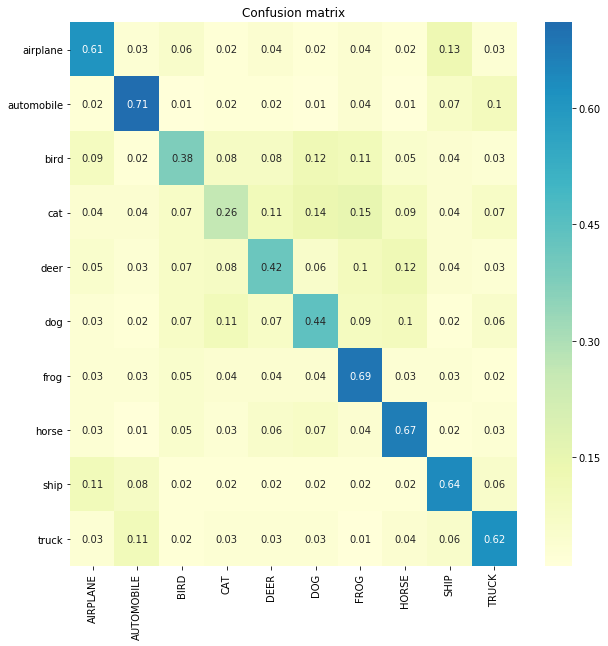

In [55]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
L = [i.upper() for i in labels]
cm = confusion_matrix(y_test, pred_shallow)
cm = (cm.astype('float') / cm.sum(axis=1)).round(2)
plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap='YlGnBu', center=0.5, xticklabels=L, yticklabels=labels)
plt.show()

In [56]:
with open('/home/agnieszka/codes_train.pkl', 'rb') as codes:
    codes_train = pickle.load(codes)
    
with open('/home/agnieszka/codes_test.pkl', 'rb') as codes:
    codes_test = pickle.load(codes)

In [59]:
points_2d = TSNE(2).fit_transform(codes_test)

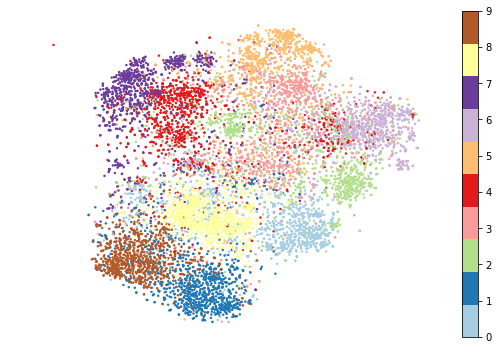

In [60]:
plt.figure(figsize=(9,6))
plt.scatter(points_2d[:, 0], points_2d[:, 1], c=y_test, cmap=plt.cm.get_cmap("Paired", 10), s=2)
plt.colorbar(ticks=range(10))
plt.axis('off')
plt.show()